# Modelo Modelo Neo-Kaleckiano Canônico

**Referência:** Lavoie (Capítulo 5)

Equações:

- Lucro PC: $r = \frac{P\cdot u}{v}$
- Lucro ED: $r^{ED} = (\alpha - \beta u_n + \beta u)/s_p$
- Participação dos lucros: $P = \frac{\theta}{1+\theta}$
- Poupança: $g^s = s_pr$
    - Investimento: $g^i = \alpha + \beta(u-u_n)$

## Construindo modelo em python

Carregando pacotes:

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve.model import Model
from pysolve.utils import is_close,round_solution

import matplotlib.pyplot as plt

Criando modelo:

In [2]:
model = Model()
model.set_var_default(0)

Definindo variáveis

In [3]:
model.var('r', desc= 'Lucro')
model.var('red', desc= ' Lucro demanda efetiva')
model.var('P', desc= 'Participação dos Lucros')
model.var('u', desc= 'Grau de utilização da capacidade')
model.var('gs', desc= 'Taxa de poupança')
model.var('gi', desc= 'Taxa de investimento');


Definindo parâmetros

In [4]:
model.param('v', desc='Relação K/Y', default=0.5)
model.param('sp', desc = 'Propensão a poupar a partir dos lucros', default= 0.7)
model.param('theta', desc = 'Markup', default= 0.3)
model.param('un', desc = 'Grau de utilitação normal', default=0.7)
model.param('alpha', desc= 'Animal Spirits', default= 1)
model.param('beta', desc= 'Sensibilidade do investimento ao grau de utilização', default=2);
    

Definindo equações:

In [5]:
model.add('P = theta/(1+theta)')
model.add('r = (P*u)/v')
model.add('red = (alpha - beta*un + beta*u)/sp')
model.add('gs = sp*r')
model.add('gi = alpha + beta*(u-un)')
model.add('u = (alpha - beta*un)/(sp*P/v - beta)');

Resolvendo

In [6]:
model.solve(iterations=100, threshold=1e-5)

prev = round_solution(model.solutions[-2], decimals=1)
solution = round_solution(model.solutions[-1], decimals=1)
print("P         : " + str(solution['P']))
print("r         : " + str(solution['r']))
print("red       : " + str(solution['red']))
print("u         : " + str(solution['u']))
print("gs        : " + str(solution['gs']))
print("gi        : " + str(solution['gi']))

P         : 0.2
r         : 0.1
red       : 0.1
u         : 0.2
gs        : 0.1
gi        : 0.1


Criando tabela:

In [7]:
from IPython.display import HTML
import numpy
import pandas as pd
from pysolve.utils import generate_html_table
data = {'Variável': ['P', 'r', 'red', 'u', 'gs', 'gi'],
        'Valores' : [solution['P'], solution['r'], solution['red'], solution['u'], solution['gs'], solution['gi']]}
tabela = pd.DataFrame(data=data)
print(tabela)

  Variável  Valores
0        P      0.2
1        r      0.1
2      red      0.1
3        u      0.2
4       gs      0.1
5       gi      0.1


## Steady State


In [8]:
steady_state = Model()

for _ in range(100):
    steady_state.solve(iterations=100, threshold=1e-5)

    prev_soln = steady_state.solutions[-2]
    soln = steady_state.solutions[-1]
    if is_close(prev_soln, soln, atol=1e-4):
        break

prev = round_solution(model.solutions[-2], decimals=1)
solution = round_solution(model.solutions[-1], decimals=1)
print("P         : " + str(solution['P']))
print("r         : " + str(solution['r']))
print("red       : " + str(solution['red']))
print("u         : " + str(solution['u']))
print("gs        : " + str(solution['gs']))
print("gi        : " + str(solution['gi']))

P         : 0.2
r         : 0.1
red       : 0.1
u         : 0.2
gs        : 0.1
gi        : 0.1


Graficamente:

In [9]:
alphagi = 1
betagi = 2
ungi = 0.7
index_gi = list(range(0, 11, 1))
linhagi = [alphagi + betagi*(index_gi[i]/10 - ungi) for i in index_gi]

In [10]:
Spgs = 0.7
index_gs = list(range(0, 11, 1))
linhags = [Spgs*index_gs[i]/10 for i in index_gs]

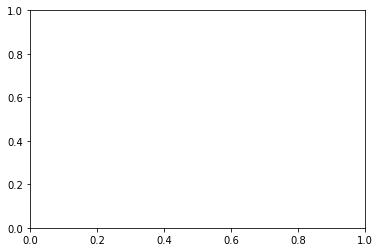

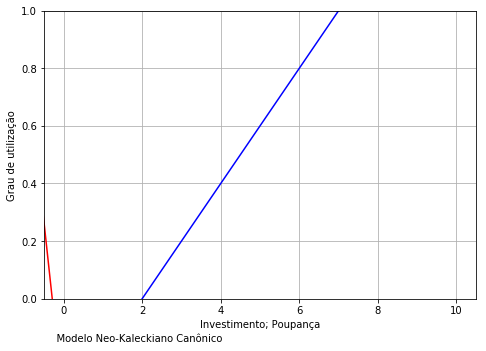

In [11]:
from matplotlib import transforms

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

caption = '''
    Modelo Neo-Kaleckiano Canônico'''


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.0, 1.0])
axes.tick_params(top=False)
axes.set_ylim(0, 1)
axes.plot(linhags, linestyle='-', color='r', transform= rot + base)
axes.plot(linhagi, 'b')
plt.grid(True)

fig.text(0.1, -0.05, caption)
axes.set_ylabel("Grau de utilização")
axes.set_xlabel("Investimento; Poupança");